# **PROJETO FINAL PYTHON EBAC -- OUT/2023**




# 1\. **INTRODUÇÃO**

### 1.1. **Descrição do Projeto:**

> O projeto "Análise de Inadimplência de Clientes em um Banco" é um estudo detalhado que utiliza técnicas de análise de dados e visualização para compreender e identificar os fatores que levam à inadimplência de clientes em um banco X. O objetivo principal é fornecer insights acionáveis que ajudem o banco a tomar decisões informadas e a desenvolver estratégias para reduzir a inadimplência.



### 1.2. **Coleta de dados**

> Nesta etapa, foram coletados os [dados](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv) relevantes, que incluem informações sobre os clientes, como nível de escolaridade, renda, histórico de transações, tipos de empréstimos, entre outros. Além disso, foram incorporados dados que representam a situação de `adimplência, com o valor 0`, e `inadimplência, com o valor 1`, os quais foram agrupados sob a categoria denominada **'default'**.

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |

- Importação das bibliotecas utilizadas no projeto

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('/kaggle/input/credito2/credito.csv', na_values = 'na')

In [3]:
df.iloc[50:55] # Escolha do numero de linhas para vizualizar default com 0 e 1

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
50,720756708,0,52,F,3,NaN,casado,menos que $40K,blue,41,6,2,3,"2.622,45","1.878,14",30
51,779471883,1,54,F,1,mestrado,casado,menos que $40K,blue,40,2,1,3,"1.438,08","705,59",19
52,711525033,0,66,F,0,ensino medio,casado,menos que $40K,blue,54,3,2,4,"3.171,17","1.946,81",38
53,712813458,0,49,M,2,NaN,casado,$120K +,blue,36,4,0,2,"19.763,65","1.414,42",35
54,714374133,1,56,M,2,mestrado,casado,$120K +,blue,36,1,3,3,"15.769,34","602,60",15


In [4]:
df.shape # retorna uma tupla (quantidade de linhas e colunas)

(10127, 16)

In [5]:
df[df['default'] == 0].shape # Adimplentes

(8500, 16)

In [6]:
 df[df['default'] == 1].shape # Inadimplentes

(1627, 16)

In [7]:
total_clientes = df.shape[0]

total_adimplentes = df[df['default'] == 0].shape[0]
porcentagem_adimplentes = (100 * total_adimplentes / total_clientes)

total_inadimplentes = df[df['default'] == 1].shape[0]
porcentagem_inadimplentes = (100 * total_inadimplentes / total_clientes)

print (f'A quantidade de adimplentes é {total_adimplentes} o que representa um total de {porcentagem_adimplentes:.2f}%')
print (f'A quantidade total de inadimplentes é {total_inadimplentes} o que representa um total de {porcentagem_inadimplentes:.2f} %')

A quantidade de adimplentes é 8500 o que representa um total de 83.93%
A quantidade total de inadimplentes é 1627 o que representa um total de 16.07 %


# 2\. **ORGANIZAÇÃO DOS DADOS**

## 2.1. **Schema**

> Organização dos dados, incluindo o tipo de dados em cada coluna, os nomes das colunas e outras informações importantes que ajudam a entender como os dados estão formatados.



In [8]:
df.head(n = 5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


- Nomes das colunas e os tipos de dados associados a cada uma

In [9]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

- Características categóricas.

In [10]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


- Características numéricas.

In [11]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


## 2.2.**Pré-processamento de Dados**

> Os dados são limpos e preparados para análise. Isso envolve lidar com valores ausentes, padronização, normalização e qualquer transformação necessária.


>  
    - Vazios (`""`);
    - Nulos (`None`);
    - Não disponíveis ou aplicaveis (`na`, `NA`, etc.);
    - Não numérico (`nan`, `NaN`, `NAN`, etc).

In [12]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


- É possível identificar quais colunas têm valores ausentes.

In [13]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

- A função a seguir calcula estatísticas relacionadas às colunas com dados ausentes.

In [14]:
def dados_faltantes(df: pd.DataFrame):
  dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd,_ =  df[df[col].isna()].shape
      total,_ = df.shape
      porcentagem = round(100 * qtd / total, 2)

      msg = f'A quantidade de dados faltantes em {col} é de {qtd} e representa {porcentagem} %'

      dict_dados_faltantes = {col: {'quantidade': qtd, 'porcentagem': porcentagem, 'mensagem': msg}}
      dados_faltantes.append(dict_dados_faltantes)

  for stats in dados_faltantes:
    print(stats[list(stats.keys())[0]]['mensagem'])

In [15]:
print ('Estatíscas de Dados Faltantes por área TOTAL: ')
dados_faltantes(df=df)

Estatíscas de Dados Faltantes por área TOTAL: 
A quantidade de dados faltantes em escolaridade é de 1519 e representa 15.0 %
A quantidade de dados faltantes em estado_civil é de 749 e representa 7.4 %
A quantidade de dados faltantes em salario_anual é de 1112 e representa 10.98 %


In [16]:
print ('Estatíscas de Dados Faltantes por área de ADIMPLENTES: ')
print ()
dados_faltantes(df = df[df['default'] == 0])

Estatíscas de Dados Faltantes por área de ADIMPLENTES: 

A quantidade de dados faltantes em escolaridade é de 1263 e representa 14.86 %
A quantidade de dados faltantes em estado_civil é de 620 e representa 7.29 %
A quantidade de dados faltantes em salario_anual é de 925 e representa 10.88 %


In [17]:
print ('Estatíscas de Dados Faltantes por área de INADIMPLENTES: ')
print ()
dados_faltantes(df=df[df['default'] == 1])

Estatíscas de Dados Faltantes por área de INADIMPLENTES: 

A quantidade de dados faltantes em escolaridade é de 256 e representa 15.73 %
A quantidade de dados faltantes em estado_civil é de 129 e representa 7.93 %
A quantidade de dados faltantes em salario_anual é de 187 e representa 11.49 %


## 2.3.**Data Wrangling**

> A etapa de preparação de dados, conhecida como "data wrangling," envolve a transformação e limpeza do conjunto de dados para facilitar a análise. Especificamente, vamos realizar as seguintes ações:

- Atualizar o esquema das nossas colunas.
- Eliminar os dados ausentes.



 - Durante a fase de exploração, identificamos que as colunas "limite_credito" e "valor_transacoes_12m" estavam sendo erroneamente classificadas como categóricas (com um tipo de dados "object").

In [18]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [19]:
df[['limite_credito', 'valor_transacoes_12m']].head(n = 5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


- Iremos criar uma função `limpar` para realizar a limpeza dos dados. No entanto, antes de implementá-la, vamos testá-la.

In [20]:
def limpar(valor):
  if isinstance(valor, str):
    valor_limpo = valor.replace('.', '').replace(',', '.')
    return float(valor_limpo)
  else:
    return valor

In [21]:
valores_teste = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = [limpar(valor) for valor in valores_teste]

print(valores_limpos)

[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


- Agora que a função `limpar` de limpeza está pronta, basta aplicá-la às colunas de interesse.

In [22]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(limpar)
df['limite_credito'] = df['limite_credito'].apply(limpar)

- Verificando o novo Schema:

In [23]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

- Características categóricas.

In [24]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


Características numéricas.

In [25]:
df.drop('id', axis = 1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


## 2.4.**Eliminação de dados ausentes.**

- Dado que o Pandas identifica automaticamente dados ausentes, a eliminação das linhas problemáticas é uma tarefa simples.

In [26]:
df.dropna(inplace = True)

- Vamos revisitar a estrutura dos dados mais uma vez.

In [27]:
df.shape

(7081, 16)

In [28]:
total_clientes_limpos = df.shape[0]

total_adimplentes_limpos= df[df['default'] == 0].shape[0]
porcentagem_adimplentes_limpos= (100 * total_adimplentes_limpos / total_clientes_limpos)

total_inadimplentes_limpos = df[df['default'] == 1].shape[0]
porcentagem_inadimplentes_limpos = (100 * total_inadimplentes_limpos / total_clientes_limpos)


print (f'A quantidade de adimplentes ANTES da limpeza é {total_adimplentes} pessoas = {porcentagem_adimplentes:.2f}%')
print (f'A quantidade de adimplentes APÓS a limpeza é {total_adimplentes_limpos} pessoas = {porcentagem_adimplentes_limpos:.2f}%')
print()
print (f'A quantidade total de inadimplentes ANTES da limpeza é {total_inadimplentes} pessoas = {porcentagem_inadimplentes:.2f}%')
print (f'A quantidade total de inadimplentes APÓS a limpeza é {total_inadimplentes_limpos} = {porcentagem_inadimplentes_limpos:.2f}%')

A quantidade de adimplentes ANTES da limpeza é 8500 pessoas = 83.93%
A quantidade de adimplentes APÓS a limpeza é 5968 pessoas = 84.28%

A quantidade total de inadimplentes ANTES da limpeza é 1627 pessoas = 16.07%
A quantidade total de inadimplentes APÓS a limpeza é 1113 = 15.72%


# 3\. **ANÁLISE EXPLORATÓRIA DE DADOS**

> Nesta etapa, são realizadas análises estatísticas e visualizações para identificar tendências, padrões e correlações nos dados. São criados gráficos e resumos estatísticos que ajudam a entender a distribuição das variáveis e suas relações com a inadimplência.



- Dividindo os clientes entre aqueles que estão adimplentes e inadimplentes.

In [29]:
df_adimplentes = df[df['default'] == 0]

In [30]:
df_inadimplentes = df[df['default'] == 1]

### **3.1. Visualizações categóricas**

 - Vamos explorar a relação entre a variável de resposta "default" e as características categóricas.

In [31]:
df.select_dtypes('object').head(n = 5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


 - Escolaridade

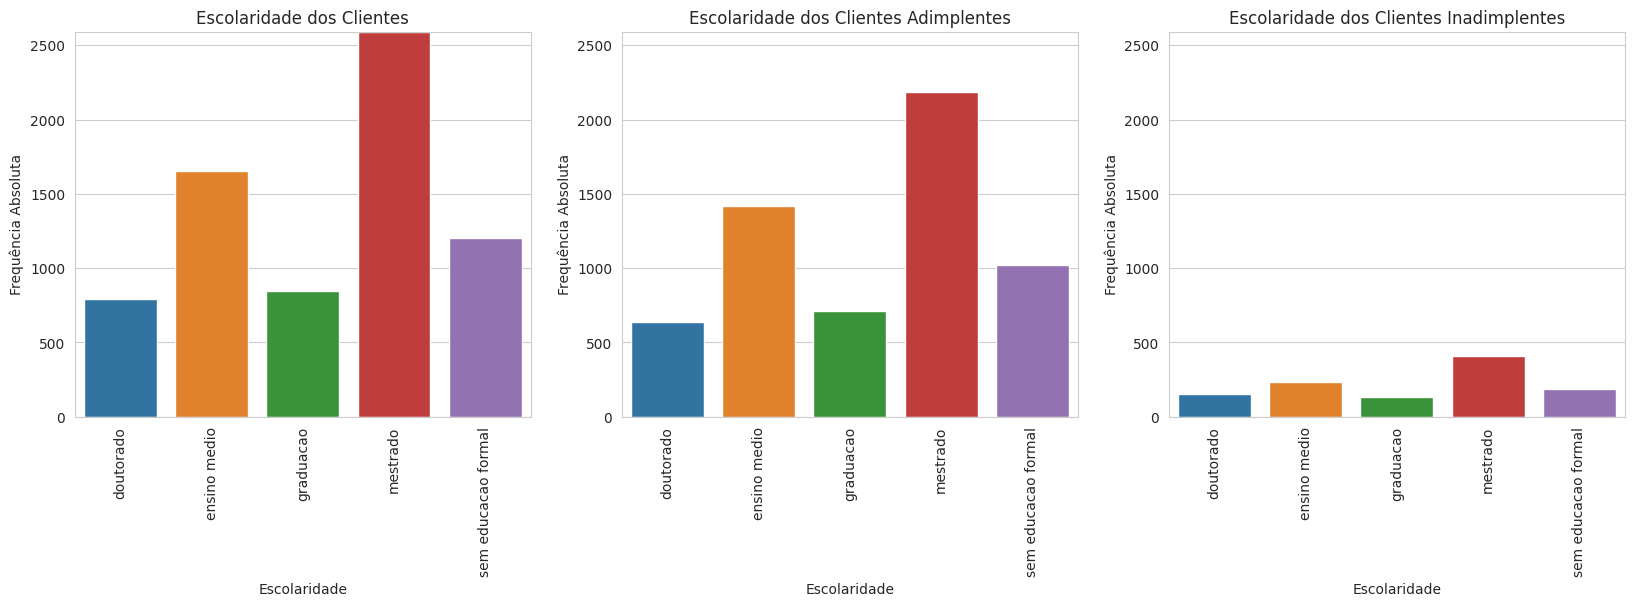

In [32]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max_freq = df[coluna].value_counts().max() * 1.1

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)


for dataframe in [df, df_adimplentes, df_inadimplentes]:
    
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']

    
    df_to_plot = df_to_plot.sort_values(by=coluna)

   
    f = sns.barplot(x=coluna, y='frequencia_absoluta', data=df_to_plot, ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

   
    max_y_f = df_to_plot['frequencia_absoluta'].max()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim = (0, max_y))

    eixo += 1

figura.show()

 - Salário Anual

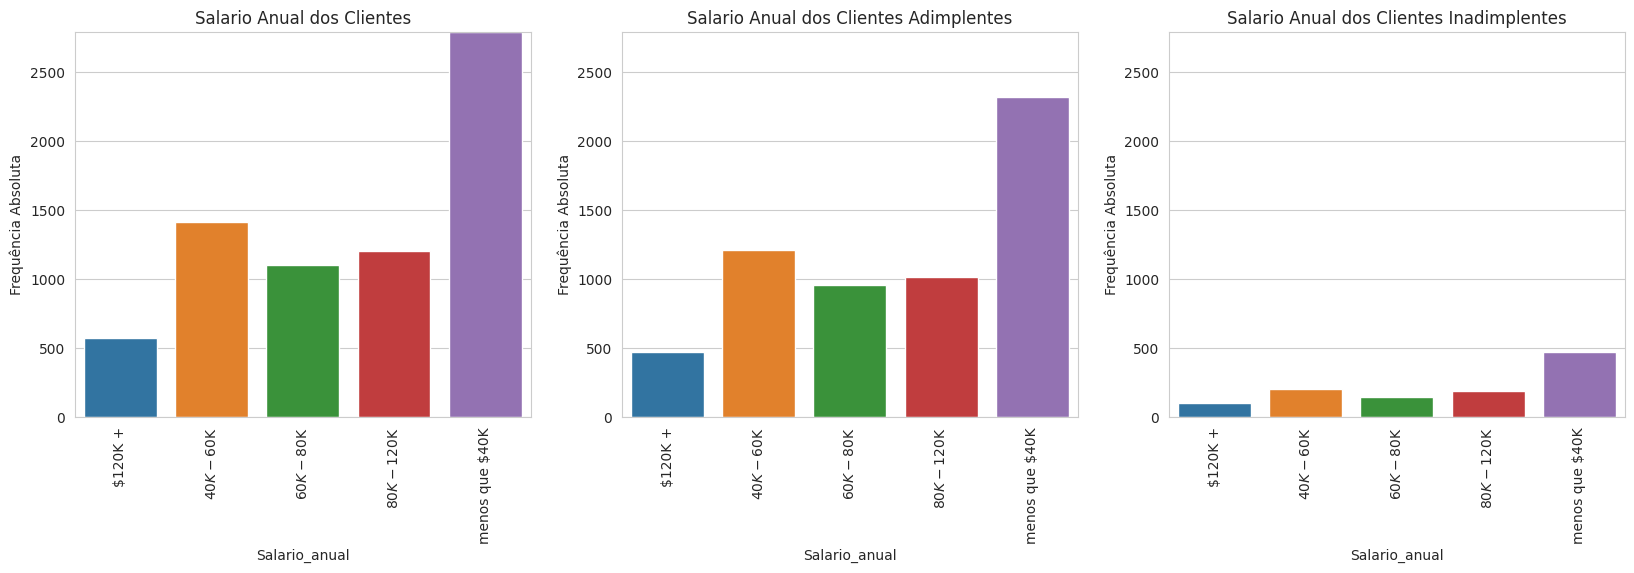

In [33]:
coluna = 'salario_anual'
titulos = ['Salario Anual dos Clientes', 'Salario Anual dos Clientes Adimplentes', 'Salario Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max_freq = df[coluna].value_counts().max() * 1.1

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)


for dataframe in [df, df_adimplentes, df_inadimplentes]:
    
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']

    
    df_to_plot = df_to_plot.sort_values(by=coluna)

   
    f = sns.barplot(x=coluna, y='frequencia_absoluta', data=df_to_plot, ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

   
    max_y_f = df_to_plot['frequencia_absoluta'].max()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim = (0, max_y))

    eixo += 1

figura.show()

### 3.2.**Visualizações numéricas.**

- Vamos explorar a relação entre a variável de resposta "default" e as características numéricas.

In [34]:
df.drop(['id', 'default'], axis = 1).select_dtypes('number').head(n = 5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


- Quantidade de Transações nos Últimos 12 Meses

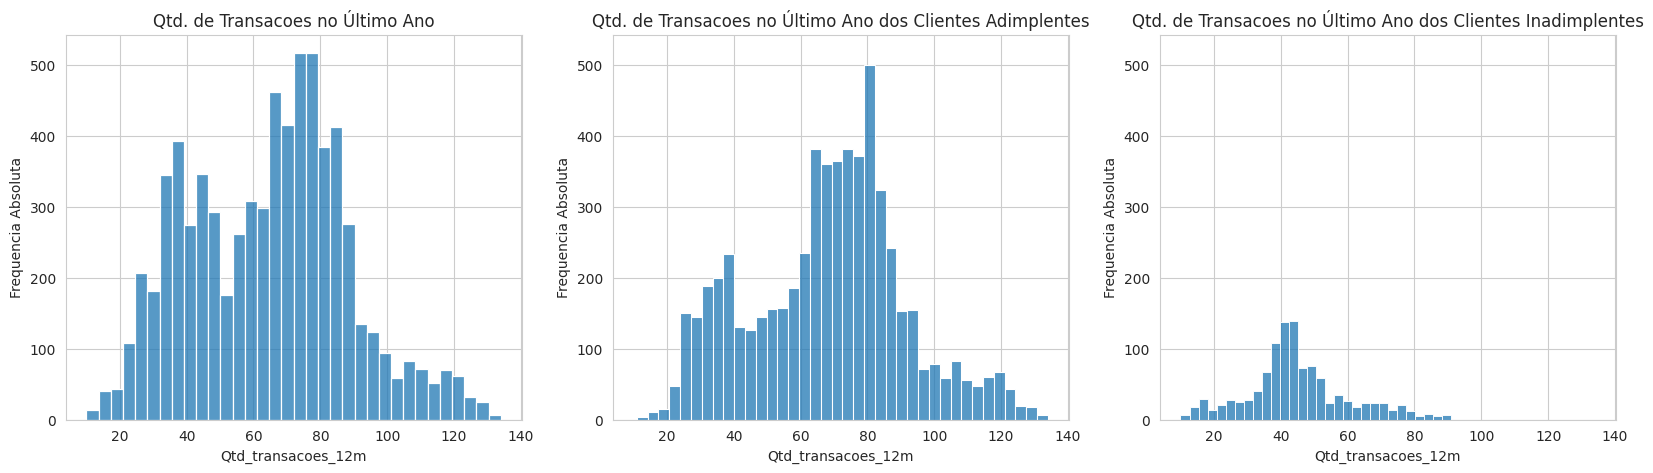

In [35]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transacoes no Último Ano', 'Qtd. de Transacoes no Último Ano dos Clientes Adimplentes', 'Qtd. de Transacoes no Último Ano dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1, 3, figsize = (20, 5), sharex = True)

for dataframe in [df, df_adimplentes, df_inadimplentes]:

  f = sns.histplot(x = coluna, data = dataframe, stat = 'count', ax = eixos[eixo])
  f.set(title = titulos[eixo], xlabel = coluna.capitalize(), ylabel = 'Frequencia Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

- Valor das Transações nos Últimos 12 Meses

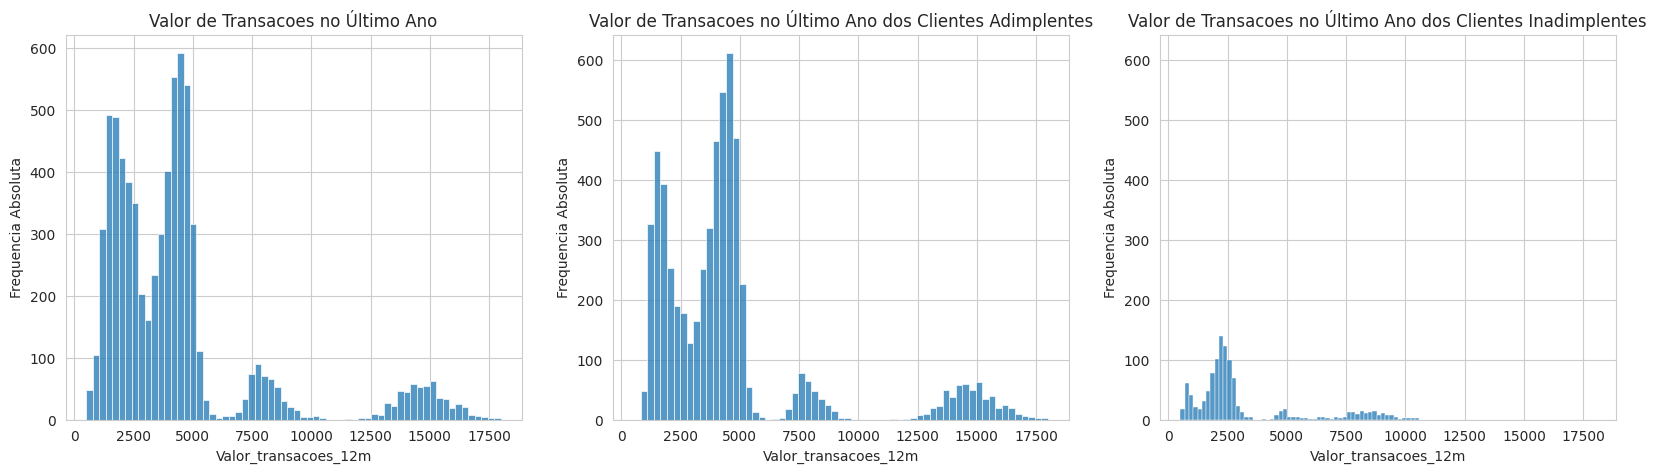

In [36]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor de Transacoes no Último Ano', 'Valor de Transacoes no Último Ano dos Clientes Adimplentes', 'Valor de Transacoes no Último Ano dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1, 3, figsize = (20, 5), sharex = True)

for dataframe in [df, df_adimplentes, df_inadimplentes]:

  f = sns.histplot(x = coluna, data = dataframe, stat = 'count', ax = eixos[eixo])
  f.set(title = titulos[eixo], xlabel = coluna.capitalize(), ylabel = 'Frequencia Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

 - Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


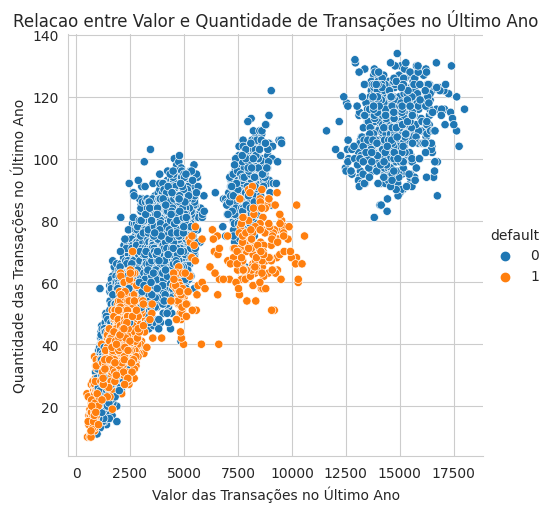

In [37]:
f = sns.relplot(x = 'valor_transacoes_12m', y = 'qtd_transacoes_12m', data = df, hue = 'default')
_ = f.set(
    title = 'Relacao entre Valor e Quantidade de Transações no Último Ano',
    xlabel = 'Valor das Transações no Último Ano',
    ylabel = 'Quantidade das Transações no Último Ano'
    )

# 4\. **INSIGHTS GERADOS**

A análise de dados revelou informações fundamentais para a identificação de padrões de inadimplência em uma instituição financeira. Especificamente, a análise destaca a relevância crítica da relação entre o valor e a quantidade de transações realizadas no último ano. Através dessa análise, foi constatado que clientes com mais de **80** transações e valores superiores a `R$ 10.000` demonstram um perfil de baixo risco de inadimplência. Em contraste, os clientes que realizam menos de **60** transações anuais e efetuam compras com valores entre `R$ 0` e `R$ 2.500` apresentam a mais elevada probabilidade de inadimplência.

Adicionalmente, observou-se que os clientes que realizam entre **60** e **80** transações e efetuam compras na faixa entre `R$ 7.500` e `R$ 10.000` também exibem uma considerável propensão à inadimplência. Esse insight sublinha a importância crítica da análise de dados na formulação de estratégias e políticas de gestão de riscos financeiros, com o potencial de melhorar a eficácia das decisões tomadas pela instituição financeira.